In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np

from utils import read_sheet

In [2]:
label_to_id = {'Regular': 0, 'Trip': 1, 'Hobby': 2}
def get_X_and_y_from_sheet(spreadsheet_id, sheet_name, X, y, skip_hobby=False):
    values = read_sheet(spreadsheet_id, sheet_name)
    data = np.array(values[1:-1])   # Remove header and footer rows
    data = data[:,:3]               # Remove last three columns that aren't needed
    
    for date_desc, cost, label in data:
        if skip_hobby and label == 'Hobby':
            continue
        date, desc = date_desc.split(' ', maxsplit=1)
        X.append([date, desc, cost])
        y.append(label_to_id[label])

In [3]:
SPREADSHEET_ID = "1Ik2lyOO5MN9a8-hEUf4sRqUlP3WcN36ItekQSGV4NxY"

X_full, y = [], []
get_X_and_y_from_sheet(SPREADSHEET_ID, "Jul 2023", X_full, y)
get_X_and_y_from_sheet(SPREADSHEET_ID, "Aug 2023", X_full, y)
get_X_and_y_from_sheet(SPREADSHEET_ID, "Sep 2023", X_full, y)
get_X_and_y_from_sheet(SPREADSHEET_ID, "Oct 2023", X_full, y)
get_X_and_y_from_sheet(SPREADSHEET_ID, "Nov 2023", X_full, y)
get_X_and_y_from_sheet(SPREADSHEET_ID, "Dec 2023", X_full, y)
get_X_and_y_from_sheet(SPREADSHEET_ID, "Jan 2024", X_full, y)
get_X_and_y_from_sheet(SPREADSHEET_ID, "Feb 2024", X_full, y)
get_X_and_y_from_sheet(SPREADSHEET_ID, "Mar 2024", X_full, y)
get_X_and_y_from_sheet(SPREADSHEET_ID, "Apr 2024", X_full, y)
get_X_and_y_from_sheet(SPREADSHEET_ID, "May 2024", X_full, y)

X_full = np.array(X_full)
y = np.array(y)

print (f"Number of 'Regular' data: {np.sum(y == 0)}")
print (f"Number of 'Trip' data: {np.sum(y == 1)}")
print (f"Number of 'Hobby' data: {np.sum(y == 2)}")

Number of 'Regular' data: 458
Number of 'Trip' data: 278
Number of 'Hobby' data: 12


In [4]:
print (X_full.shape)
print (y.shape)

(748, 3)
(748,)


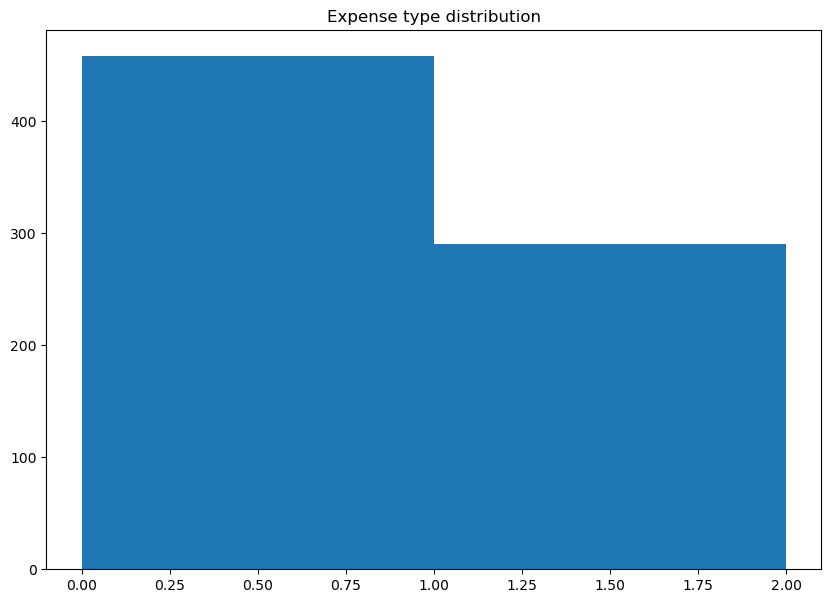

In [5]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize =(10, 7))
plt.hist(y, bins = [0, 1, 2])
plt.title("Expense type distribution")
plt.show()

In [6]:
X = np.squeeze(X_full[:,1:2])

In [7]:
import pickle
pickle.dump(X, open('pickle/X.pkl', 'ab'))
pickle.dump(y, open('pickle/y.pkl', 'ab'))

In [8]:
X = pickle.load(open('pickle/X.pkl', 'rb'))
y = pickle.load(open('pickle/y.pkl', 'rb'))

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state = 42)

In [12]:
X_val

array(['NETFLIX.COM NETFLIX.COM CA',
       'DD DOORDASH DELHIWALA 855-973-1040 CA',
       '72634006746815 EXPEDIA.COM WA',
       'BOARDWALK BW GRILLE SANTA CRUZ CA', 'CSC SERVICEWORK SAN JOSE CA',
       '    COMCAST CALIFORNIA 800-266-2278 CA',
       'GOOGLE *YouTubePremium g.co/helppay# CA',
       'TN GA INST TECH PAYPATH 913-5996699 KS',
       '    CHEVRON 0203324 SAN JOSE CA',
       'SBB CFF FFS Mobile Ticket Bern', 'Inc. New York NY',
       'EMIRATES AI 1762366307348 NEW YORK NY',
       'SAFEWAY #1990 SANTA CLARA CA', 'Gelati Tellhof Zurich',
       'Scandic Byparken FnB Bergen', 'SAFEWAY #1990 SANTA CLARA CA',
       'SAFEWAY #1990 SANTA CLARA CA',
       '& CINEMARK MOVIE CLUB 800-246-3627 TX',
       '    SAFEWAY #1990 SANTA CLARA CA',
       ' SAFEWAY #1990 SANTA CLARA CA',
       'EMIRATES AI 1762368844255 NEW YORK NY', 'CINNABON DELHI',
       '    Vrbo HATYND6P 512-759-0902 TX',
       'BEST LOCKERS (NYBIGAPP LAS VEGAS NV',
       'SAFEWAY #1990 SANTA CLARA CA', 'G

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', LogisticRegression(n_jobs=1, C=1e5)),
              ])
nb.fit(X_train, y_train)

from sklearn.metrics import classification_report
y_pred = nb.predict(X_val)

print('accuracy %s' % accuracy_score(y_pred, y_val))
print(classification_report(y_val, y_pred))#,target_names=my_tags))

accuracy 0.9466666666666667
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       136
           1       1.00      0.92      0.96        84
           2       0.50      0.40      0.44         5

    accuracy                           0.95       225
   macro avg       0.81      0.77      0.79       225
weighted avg       0.95      0.95      0.95       225



In [11]:
pickle.dump(nb, open('pickle/lr_model.pkl', 'ab'))